In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [37]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\datasets\business\hotelsevolclean_comma.csv")

In [38]:
print(df.columns)
print("======")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.head())
print("======")
print(df.info())
print("======")
print(df.isnull().any())

Index(['Classement', 'Quartier', 'Date', 'Anne', 'Occupancy rate',
       'Average Price', 'RevPAR', 'Source'],
      dtype='object')
  Classement        Quartier        Date  Anne  Occupancy rate  Average Price  \
0    3 stars             All  01-01-2013  2013        0.611553      81.204161   
1    4 stars             All  01-01-2013  2013        0.559014     111.030976   
2    5 stars             All  01-01-2013  2013        0.560899     154.448997   
3        All             All  01-01-2013  2013        0.579026     105.289497   
4        All  Autour du Ring  01-01-2013  2013        0.537395      98.811931   

      RevPAR Source  
0  49.660654    Mkg  
1  62.067880    Mkg  
2  86.630343    Mkg  
3  60.965332    Mkg  
4  53.101043    Mkg  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 8 columns):
Classement        825 non-null object
Quartier          825 non-null object
Date              825 non-null object
Anne              825 non-nul

In [39]:
df = df.loc[(df['Classement'] == 'All') & (df['Quartier'] == 'All')]

In [40]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values(by=['Date'], inplace=True)
df = df.set_index(pd.DatetimeIndex(df['Date']))
index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')

df = df.drop(['Source', 'Anne', 'Quartier', 'Classement', 'Date'], 1)

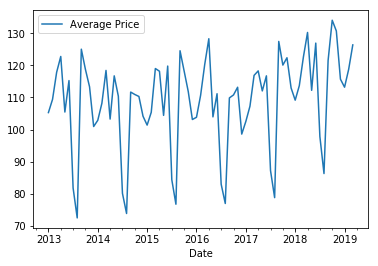

<Figure size 576x576 with 0 Axes>

In [41]:
df.plot(y='Average Price')
plt.figure(figsize=(8,8))
plt.show()

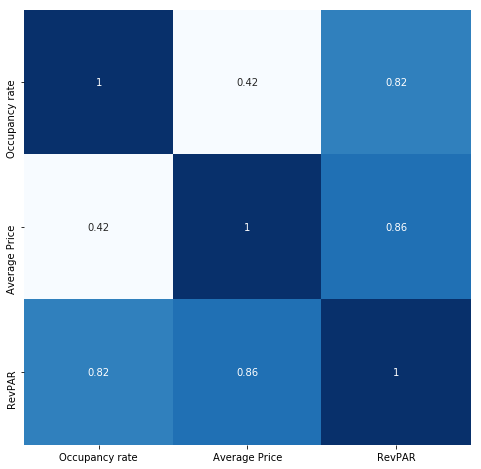

In [42]:
corr = df.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corr, cmap="Blues", cbar=False, annot=True)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
from timeit import default_timer as timer

In [44]:
model = VAR(df)
results = model.fit()
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, May, 2019
Time:                     22:14:27
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.110060
Nobs:                     74.0000    HQIC:                 -0.114526
Log likelihood:          -293.252    FPE:                   0.768545
AIC:                    -0.263572    Det(Omega_mle):        0.656268
--------------------------------------------------------------------
Results for equation Occupancy rate
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.628336         0.504316            1.246           0.213
L1.Occupancy rate         0.256686         0.730526            0.351           0.725
L1.Average Price         -0.003675 

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [45]:
model_fit = model.fit()
forecast = model_fit.forecast(model_fit.y, steps=6)
print(forecast)

[[  0.72576832 114.42469344  83.25119347]
 [  0.71484218 110.43999548  79.30745709]
 [  0.71148788 109.34333386  78.24679812]
 [  0.71057086 109.10303429  78.01397695]
 [  0.71032162 109.07075639  77.97661086]
 [  0.71023231 109.07537537  77.97351941]]
